In [1]:
import warnings
warnings.warn = lambda *a, **kw: False

In [2]:
#The basic idea
#let say you devide you training set into training set and validation set

#Learning Curve is the graph ploting the training error and validation error against the number of training instances
#at first when the model only train with only one instance the training error will be 0 becuase model can fit one instance perfectly
#on the other hand, the validation error will be very large because model trained on single instance can't generalize well on unseen data
#but as the number of training instances increase the training error will increase but validation error will decrease

In [3]:
import pandas as pd

pp_data = pd.read_excel('dataset/pp_dataset.xlsx')

In [4]:
pp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


In [5]:
#PE is our target variable 

In [6]:
#Compute Training set size

#To plot learning curve, you have to devide the dataset into training set and validation set
#In this tutorial I decide to use 80:20 ratio, so our traning set will have 7654 instances
training_sizes = [1, 100, 500, 2000, 5000, 7654]

In [7]:
#let's plot the learning curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

features = ['AT', 'V', 'AP', 'RH']
target = ['PE']
training_sizes, training_errors, validation_errors = learning_curve(LinearRegression(),
                                                                   pp_data[features], 
                                                                   pp_data[target],
                                                                   train_sizes=training_sizes,
                                                                   cv=5, 
                                                                   scoring='neg_mean_squared_error')
###how learning_curve() works?
#1. it split data into training set and validation set
#2. it train model for each trainig size using instance from training set and compute training errors and validation errors for each 
#3. it repeat step 1,2 but using different split

In [8]:
print ("Training Errors \n", training_errors)

Training Errors 
 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]


In [9]:
print("Validation Error \n", validation_errors)

Validation Error 
 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


In [10]:
#let's look at the training error and validation errors
#notice the values of training errors when training size = 100 from 2nd split onward are identical (-18.31492642)
#this is because when it devide dataset into 5 fold
#for the 1st split, 1st fold is validation fold and 2nd-5th fold are training fold. so first 100 training instance are from 2nd fold
#but from from  the 2nd split onward the 1st fold becomes training fold, So the first 100 training instances are always taken from that fold
#that's why values of 100 training instance are identical from 2nd for onward

#you can fix this behavior by set suffle parameter to True 



In [11]:
#columns represent cv-splits
#rows represent training sizes

In [12]:
#compute training error and validation error mean
training_error_means = -training_errors.mean(axis=1)
validation_error_means = -validation_errors.mean(axis=1)

print("training error for each trainig size \n", pd.Series(training_error_means, index=training_sizes))
print("\n")
print ("validation error for each training size \n", pd.Series(validation_error_means, index=training_sizes))

training error for each trainig size 
 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64


validation error for each training size 
 1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7654     20.794924
dtype: float64


(0, 40)

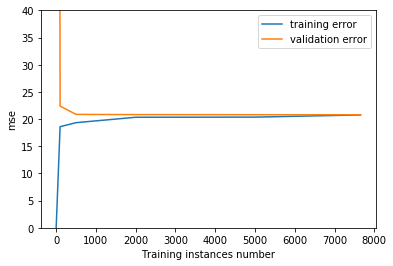

In [13]:
#let's plotting the curve

import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(training_sizes, training_error_means, label='training error')
plt.plot(training_sizes, validation_error_means, label='validation error')
plt.legend()
plt.xlabel("Training instances number")
plt.ylabel("mse")
plt.ylim(0, 40)

In [14]:
#Interpret the graph
#it seems like both training error and validation error are converged at 20 MW^2 or 4.5MW which according to domain expert opinion
#it's pretty high 
#so, our model have both problem to fit training set and to predict validation set which is a sign of overfitting
#to fix this problem adding more training instances won't import model performance
#you can try to add more meaningful feature or try more complex algoritms

In [15]:
#let's try different algorithms
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)

training_sizes, training_errors, validation_errors = learning_curve(forest_reg, 
                                                                    pp_data[features],
                                                                    pp_data[target],
                                                                    train_sizes=training_sizes,
                                                                    cv = 5,
                                                                    scoring='neg_mean_squared_error')

In [16]:
print('training score \n', training_errors)

training score 
 [[-1.29246971e-26 -1.29246971e-26 -1.29246971e-26 -1.29246971e-26
  -1.29246971e-26]
 [-5.64402763e+00 -5.72223699e+00 -5.72223699e+00 -5.72223699e+00
  -5.72223699e+00]
 [-2.86561581e+00 -3.44353468e+00 -3.44353468e+00 -3.44353468e+00
  -3.44353468e+00]
 [-2.80407472e+00 -3.09173525e+00 -2.80099496e+00 -2.80099496e+00
  -2.80099496e+00]
 [-2.33028067e+00 -2.34664671e+00 -2.37040857e+00 -2.31192738e+00
  -2.31192738e+00]
 [-2.25274010e+00 -2.16719881e+00 -2.26236209e+00 -2.15109344e+00
  -2.13964046e+00]]


In [17]:
print('validation scores \n', validation_errors)

validation scores 
 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -26.08524918  -25.46148296  -23.24495364  -24.01131088  -25.32924481]
 [ -18.28054408  -20.56779967  -18.84444542  -20.28148775  -21.81742602]
 [ -16.26347072  -18.10403908  -15.1291172   -16.25191308  -17.12039752]
 [ -13.88658551  -14.0914906   -12.96543145  -13.38986427  -14.24415057]
 [ -12.88810247  -12.72265868  -11.33651814  -11.83452978  -12.27609058]]


In [18]:
#compute its training and validation error means
forest_training_error_means = -training_errors.mean(axis=1)
forest_validation_error_means = -validation_errors.mean(axis=1)

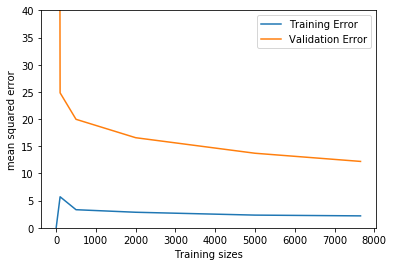

In [19]:
#plot RandomForest learning curve
plt.plot(training_sizes, forest_training_error_means, label="Training Error")
plt.plot(training_sizes, forest_validation_error_means, label="Validation Error")
plt.legend()
plt.xlabel("Training sizes")
plt.ylabel("mean squared error")
plt.ylim(0, 40)
plt.show()

In [20]:
#the training error are low but the validation error are high. this mean model are overfitting
#you can add more training instances (which is not a choice)
#or regularize your model

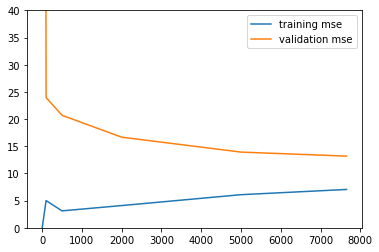

In [22]:
#let's try regularized RandomForest 
regularized_forest_reg = RandomForestRegressor(max_leaf_nodes=350)
training_sizes, training_scores, validation_scores = learning_curve(regularized_forest_reg,
                                                                    pp_data[features],
                                                                    pp_data[target], 
                                                                    train_sizes = training_sizes,
                                                                    cv=5,
                                                                    scoring='neg_mean_squared_error')
training_mse_scores = -training_scores.mean(axis=1)
validation_mse_scores = -validation_scores.mean(axis=1)

#ploting the graph
plt.plot(training_sizes, training_mse_scores, label="training mse")
plt.plot(training_sizes, validation_mse_scores, label="validation mse")
plt.legend()
plt.ylim(0, 40)
plt.show()

In [23]:
#this is better, the training error are increase means model are less overfitting